# Module import

In [1]:
%reload_ext autoreload
%autoreload 2
# from pywinusb import hid
import numpy as np
from lib.DMDpycrafter import *
from lib.Hadamard_lib.DMD_pattern_gen import *
from PIL import ImageDraw, ImageFont, Image

from skimage import io
import matplotlib.pyplot as plt


# pattern generation

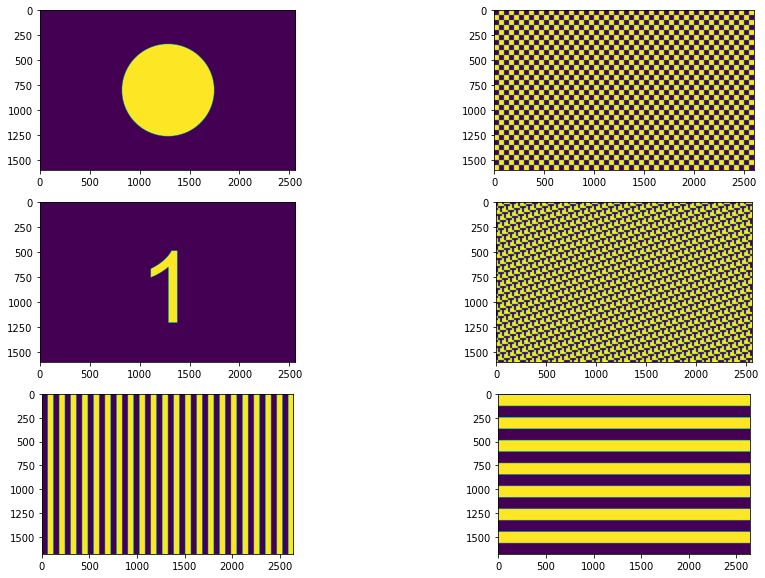

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
ax = axes.ravel()

circle = create_circular_mask(1600, 2560, radius=461) # 53 laser 0.8 mm, 461 7mm pinhole size
check = checkerboard(shape=(1600, 2560), exp_factor=50, shift=(0, 0))
number = num_image(img_size=(1600, 2560), num=1, shift=(1000, 300))
linex = line_pattern(shape=(1600, 2560), exp_factor=60, shift=(5, 0), axis='x')
liney = line_pattern(shape=(1600, 2560), exp_factor=120, shift=(5, 0), axis='y')

had = hadamard_dmd(rows=2560, cols=1600, n=11, separation=3, scale_factor=20)
images = [~had[:, :, i].astype(bool) for i in range(had.shape[-1])]
img_index_seq = list(range(len(images)))
hadamard = images[2]

ax[0].imshow(circle)
ax[1].imshow(check)
ax[2].imshow(number)
ax[3].imshow(hadamard)
ax[4].imshow(linex)
ax[5].imshow(liney)

# sequence test

## Integer sequence

### Ascending order

In [12]:
# define time units
US = 1 # microsecond
SEC = 1000000 * US # second

images = []
for i in range(10):
    images.append(num_image(img_size=(1600, 2560), num=i, shift=(1000, 300))[::-1, :])
img_index_seq = list(range(len(images)))
print('date type : ', images[0].dtype)

# define sequence 
# you have to define the index and exposure as integer
img_index_seq = list(range(len(images))) # store image index in the order of displaying you want to show
exposure = [int(0.3*SEC)] * len(images)
dark_time = [int(0.3*SEC)] * len(images) # in microsecond, no patterns are sustained 
trigger_in = [False] * len(images)
trigger_out = [0] * len(images)


date type :  bool


In [13]:
dmd = DMDhid()
dmd.stopsequence()
dmd.changemode(3)
dmd.defsequence(images,exposure,trigger_in,dark_time,trigger_out,0, img_index_seq)


merging...
encoding...
Compressed data size | master : 43083 | slave : [50283]
uploading...
0 86
0 100


In [16]:

dmd.startsequence()

In [17]:
dmd.stopsequence()

### Specifying order and duration (The way for saving memory)

In [18]:
# define time units
US = 1 # microsecond
SEC = 1000000 * US # second

# store the number from 0 to 14
images = []
for i in range(14):
    images.append(num_image(img_size=(1600, 2560), num=i, shift=(1000, 300))[::-1, :])

# define sequence 
# you have to define the index and exposure as integer
img_index_seq = [0, 5, 13, 13, 13, 1, 7, 6] # store image index in the order of displaying you want to show
img_index_seq = [int(num) for num in img_index_seq]
exposure = [0.4*SEC, 0.2*SEC, 1*SEC, 0.6*SEC, 0.2*SEC, 0.3*SEC, 0.3*SEC, 0.1*SEC]
exposure = [int(exp) for exp in exposure]


In [19]:
dmd = DMDhid()
dmd.stopsequence()
dmd.changemode(3)
dark_time=[400000]*len(img_index_seq) # in microsecond, no patterns are sustained 
trigger_in=[False]*len(img_index_seq)
trigger_out=[0]*len(img_index_seq)
dmd.defsequence(images, exposure, trigger_in, dark_time, trigger_out, 0, img_index_seq)


merging...
encoding...
Compressed data size | master : 43083 | slave : [83000]
uploading...
0 86
0 165
100 165


In [22]:
dmd.startsequence()

In [23]:
dmd.stopsequence()

## Hadamard pattern

In [29]:
had = hadamard_dmd(rows=2560, cols=1600, n=11, separation=3, scale_factor=40)
images = [~had[:, :, i].astype(bool) for i in range(had.shape[-1])]
img_index_seq = list(range(len(images)))

In [30]:
dmd = DMDhid()
dmd.stopsequence()
dmd.changemode(3)
exposure=[200000]*len(images) # in microsecond, time for sustaining number
dark_time=[000000]*len(images) # in microsecond, no patterns are sustained 
trigger_in=[False]*len(images)
trigger_out=[0]*len(images)
dmd.defsequence(images,exposure,trigger_in,dark_time,trigger_out,0, img_index_seq)


merging...
encoding...
Compressed data size | master : 11411 | slave : [11411]
uploading...
0 23
0 23


In [37]:
dmd.startsequence()

In [38]:
dmd.stopsequence()